In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc



In [2]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_clusters_per_class=1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and train the Logistic Regression model with increased max_iter
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions
logistic_predictions = logistic_model.predict(X_test)
logistic_probabilities = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate the model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f'Logistic Regression Accuracy: {logistic_accuracy}')
print(confusion_matrix(y_test, logistic_predictions))
print(classification_report(y_test, logistic_predictions))


Logistic Regression Accuracy: 0.9066666666666666
[[148   9]
 [ 19 124]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       157
           1       0.93      0.87      0.90       143

    accuracy                           0.91       300
   macro avg       0.91      0.90      0.91       300
weighted avg       0.91      0.91      0.91       300



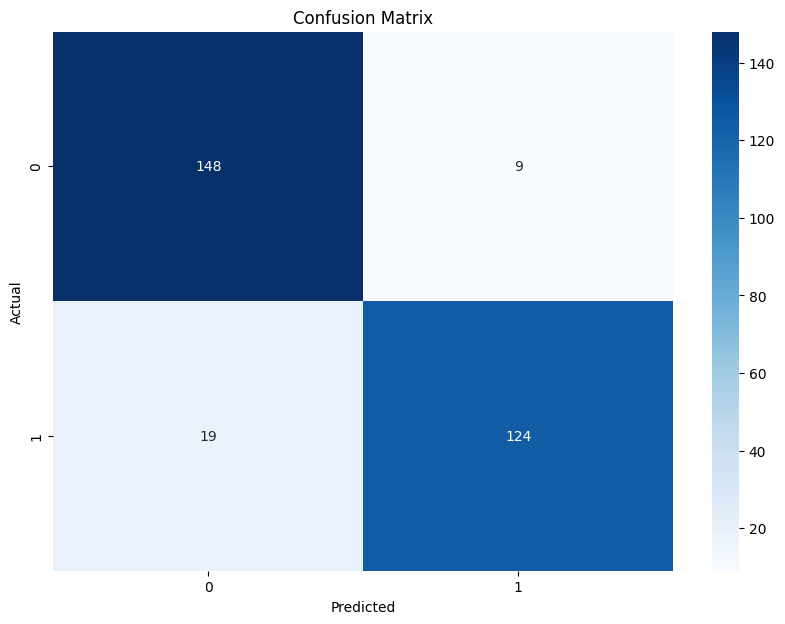

In [3]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, logistic_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

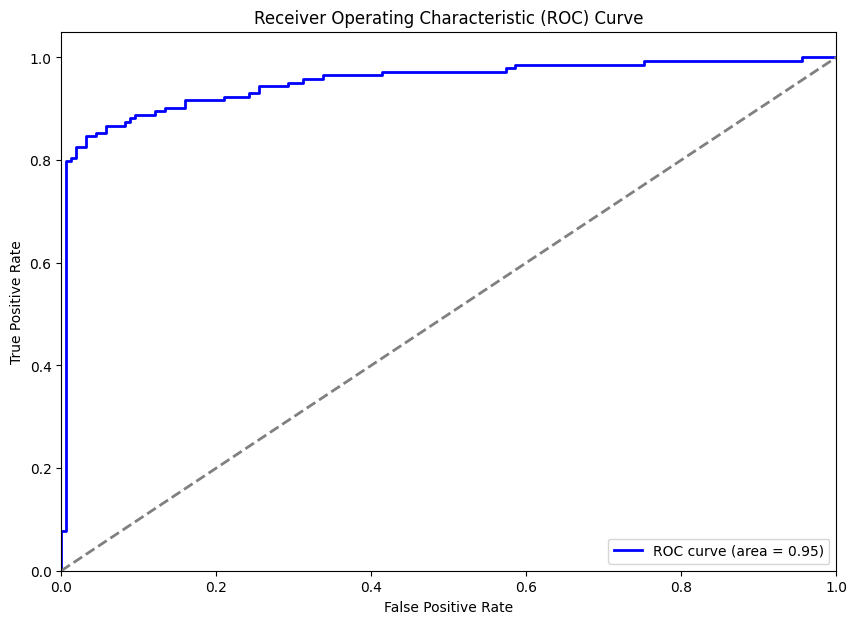

In [4]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()